In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os

In [2]:
# read in csv
read_file = os.path.join("Resources", "life_expectancy_data_region.csv")
life = pd.read_csv(read_file)
life

,Country,Year,Region,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Africa,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Africa,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Africa,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Africa,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
country_count = life["Country"].nunique()
print(f"There are a total of {country_count} unique countries in our dataset.")
region = life["Region"].nunique()
print(f"The {country_count} countries are sorted into {region} different regions, as defined by the WHO.")

There are a total of 193 unique countries in our dataset.
The 193 countries are sorted into 6 different regions, as defined by the WHO.


In [4]:
# get index of df to easily select columns to filter and help with renaming
life.columns

Index(['Country', 'Year', 'Region', 'Status', 'Life expectancy ',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# rename columns
life_df = life.rename(columns= {"Life expectancy ": "Life Expectancy (yrs)",
                                "Total expenditure": "Total Expenditure (%)",
                                  })
life_df

,Country,Year,Region,Status,Life Expectancy (yrs),Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total Expenditure (%),Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Africa,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Africa,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Africa,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Africa,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
life_df.columns

Index(['Country', 'Year', 'Region', 'Status', 'Life Expectancy (yrs)',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total Expenditure (%)', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# trim dataset to focus on the impact Total Expenditure has on the Life Expectancy by country 
trim_df = life_df[['Region', 'Country', 'Year', 'Status', 'Life Expectancy (yrs)',
              'Total Expenditure (%)']]
trim_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [8]:
# get count for each column in the trimmed df
trim_df.count()

Region                   2938
Country                  2938
Year                     2938
Status                   2938
Life Expectancy (yrs)    2928
Total Expenditure (%)    2712
dtype: int64

In [9]:
trim_df = trim_df.dropna()

In [10]:
trim_df.count()

Region                   2702
Country                  2702
Year                     2702
Status                   2702
Life Expectancy (yrs)    2702
Total Expenditure (%)    2702
dtype: int64

In [11]:
# remove rows where = Total Expenditure (%)
spending_df = trim_df.loc[trim_df["Total Expenditure (%)"] >0]
spending_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [119]:
global_df = spending_df.groupby(['Region','Country']).mean()
global_df = global_df[['Life Expectancy (yrs)', 'Total Expenditure (%)']]
global_df = global_df.reset_index()
global_df = global_df.rename(columns= {'Life Expectancy (yrs)' : 'Life Expectancy'})
global_df.head()

,Region,Country,Life Expectancy,Total Expenditure (%)
0,Africa,Algeria,73.486667,4.604000
1,Africa,Angola,48.793333,3.919333
2,Africa,Benin,57.406667,4.636000
3,Africa,Botswana,55.406667,5.510667
4,Africa,Burkina Faso,55.360000,6.038000


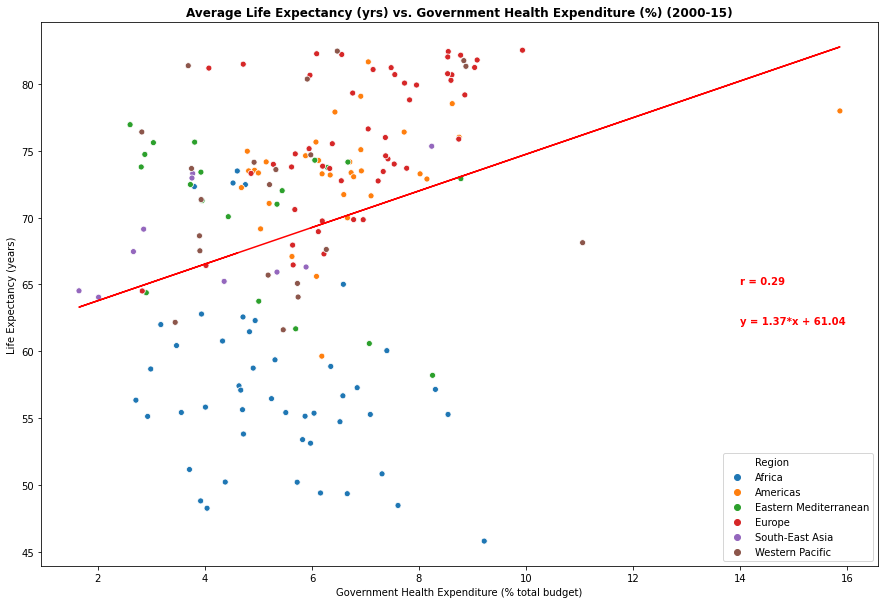

In [124]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=global_df, x="Total Expenditure (%)", y="Life Expectancy", hue="Region")
plt.title("Average Life Expectancy (yrs) vs. Government Health Expenditure (%) (2000-15)", fontweight="bold")
plt.xlabel("Government Health Expenditure (% total budget)")
plt.ylabel("Life Expectancy (years)")

# perform regression on life expectancy vs health expenditure in developing nations
(slope, intercept, rvalue, pvalue, stderr) = linregress(global_df["Total Expenditure (%)"],global_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (global_df["Total Expenditure (%)"]* slope) + intercept
plt.plot(global_df["Total Expenditure (%)"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq,(14,62),color="red", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (14, 65), color="red", fontweight = "bold")

# plt.savefig("Images/DevelopedNations.png")
plt.show()

In [12]:
dev_df = spending_df.loc[spending_df["Status"] == "Developed"]
dev_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
113,Western Pacific,Australia,2014,Developed,82.7,9.42
114,Western Pacific,Australia,2013,Developed,82.5,9.36
115,Western Pacific,Australia,2012,Developed,82.3,9.36
116,Western Pacific,Australia,2011,Developed,82.0,9.20
117,Western Pacific,Australia,2010,Developed,81.9,9.20
...,...,...,...,...,...,...
2805,Americas,United States of America,2004,Developed,77.5,15.14
2806,Americas,United States of America,2003,Developed,77.2,15.60
2807,Americas,United States of America,2002,Developed,77.0,14.55
2808,Americas,United States of America,2001,Developed,76.9,13.73


In [109]:
dev_grp = dev_df.groupby(['Region','Country']).mean()
dev_grp = dev_grp[['Life Expectancy (yrs)', 'Total Expenditure (%)']]
dev_grp = dev_grp.reset_index()
dev_grp = dev_grp.rename(columns= {'Life Expectancy (yrs)' : 'Life Expectancy'})
dev_grp.head()

,Region,Country,Life Expectancy,Total Expenditure (%)
0,Americas,United States of America,77.980000,15.863333
1,Europe,Austria,81.480000,4.715333
2,Europe,Belgium,80.653333,5.962000
3,Europe,Bulgaria,72.740000,7.236000
4,Europe,Croatia,75.993333,7.370667


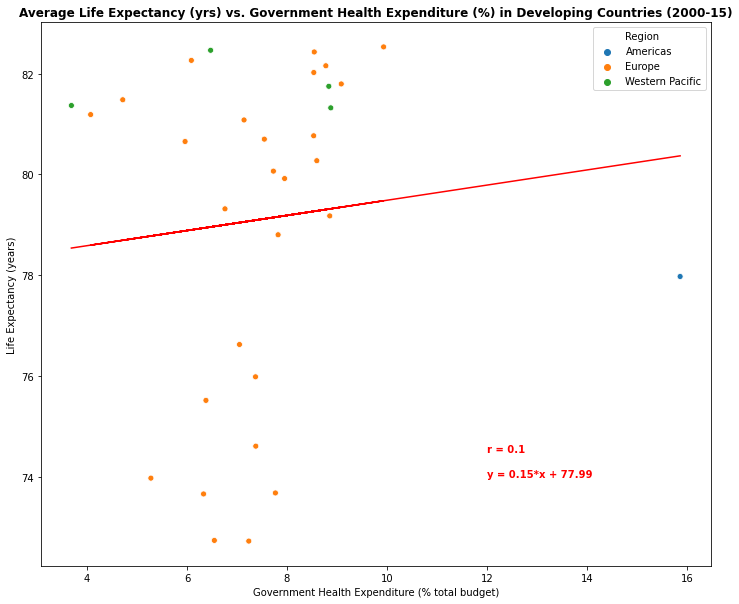

In [118]:
plt.figure(figsize = (12,10))
sns.scatterplot(data=dev_grp, x="Total Expenditure (%)", y="Life Expectancy", hue="Region")
plt.title("Average Life Expectancy (yrs) vs. Government Health Expenditure (%) in Developing Countries (2000-15)", fontweight="bold")
plt.xlabel("Government Health Expenditure (% total budget)")
plt.ylabel("Life Expectancy (years)")

# perform regression on life expectancy vs health expenditure in developing nations
(slope, intercept, rvalue, pvalue, stderr) = linregress(dev_grp["Total Expenditure (%)"],dev_grp["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (dev_grp["Total Expenditure (%)"]* slope) + intercept
plt.plot(dev_grp["Total Expenditure (%)"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq,(12,74),color="red", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (12, 74.5), color="red", fontweight = "bold")

# plt.savefig("Images/DevelopedNations.png")
plt.show()

In [57]:
undev_df = spending_df.loc[spending_df["Status"] == "Developing"]
undev_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [78]:
undev_grp = undev_df.groupby(['Region','Country']).mean()
undev_grp = undev_grp[['Life Expectancy (yrs)', 'Total Expenditure (%)']]
undev_grp = undev_grp.reset_index()
undev_grp.head()

,Region,Country,Life Expectancy (yrs),Total Expenditure (%)
0,Africa,Algeria,73.486667,4.604000
1,Africa,Angola,48.793333,3.919333
2,Africa,Benin,57.406667,4.636000
3,Africa,Botswana,55.406667,5.510667
4,Africa,Burkina Faso,55.360000,6.038000


In [80]:
undev_grp = undev_grp.rename(columns= {'Life Expectancy (yrs)' : 'Life Expectancy'})

In [81]:
undev_grp['Region'].unique()

array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'], dtype=object)

In [61]:
undev_grp2 = undev_grp.rename(columns= {'Life Expectancy (yrs)' : 'Life Expectancy'})
undev_grp2 = undev_grp2[['Life Expectancy', 'Total Expenditure (%)']]
undev_grp2

,Life Expectancy,Total Expenditure (%)
Country,,
Afghanistan,58.193750,8.252500
Albania,75.156250,5.945625
Algeria,73.486667,4.604000
Angola,48.793333,3.919333
Antigua and Barbuda,74.966667,4.791333
...,...,...
Venezuela (Bolivarian Republic of),73.340000,4.998667
Viet Nam,74.693333,5.977333
Yemen,63.740000,5.005333


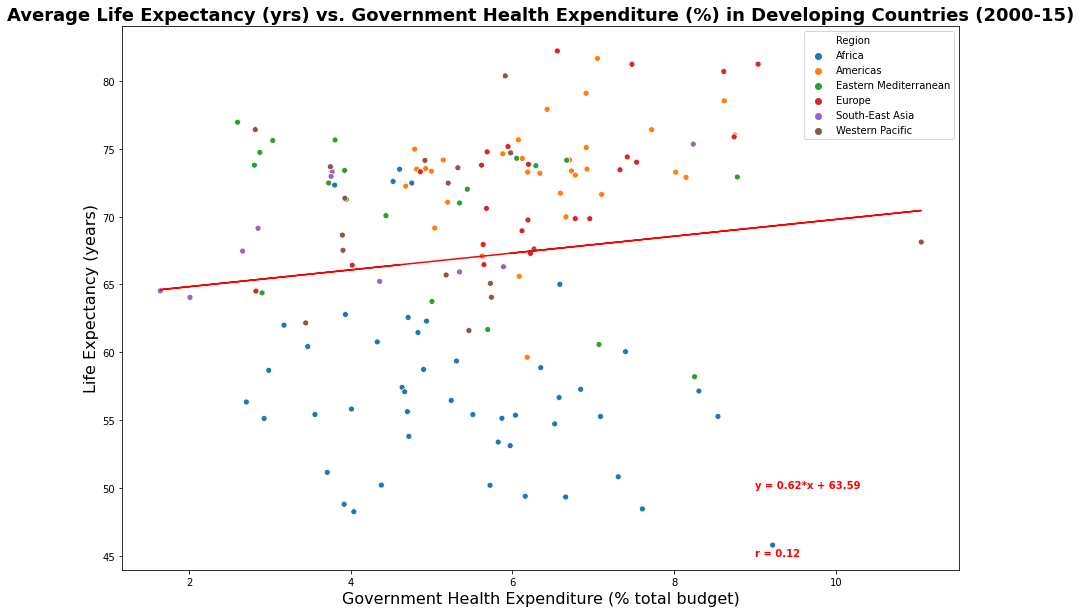

In [179]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=undev_grp, x="Total Expenditure (%)", y="Life Expectancy", hue="Region")
plt.title("Average Life Expectancy (yrs) vs. Government Health Expenditure (%) in Developing Countries (2000-15)", fontweight="bold", fontsize=18)
plt.xlabel("Government Health Expenditure (% total budget)", fontsize=16)
plt.ylabel("Life Expectancy (years)", fontsize=16)

# perform regression on life expectancy vs health expenditure in developing nations
(slope, intercept, rvalue, pvalue, stderr) = linregress(undev_grp["Total Expenditure (%)"],undev_grp["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (undev_grp["Total Expenditure (%)"]* slope) + intercept
plt.plot(undev_grp["Total Expenditure (%)"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq,(9,50),color="red", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (9, 45), color="red", fontweight = "bold")

plt.savefig("Images/Developed_1.png")
plt.show()


In [35]:
undev_df["Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'South-East Asia', 'Western Pacific'], dtype=object)

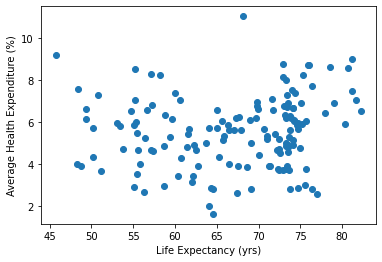

In [18]:
life_exp = undev_grp['Life Expectancy (yrs)']
expen = undev_grp['Total Expenditure (%)']
plt.scatter(life_exp, expen)
plt.xlabel("Life Expectancy (yrs)")
plt.ylabel("Average Health Expenditure (%)")
plt.show()

Text(0, 0.5, 'Life Expectancy (years)')

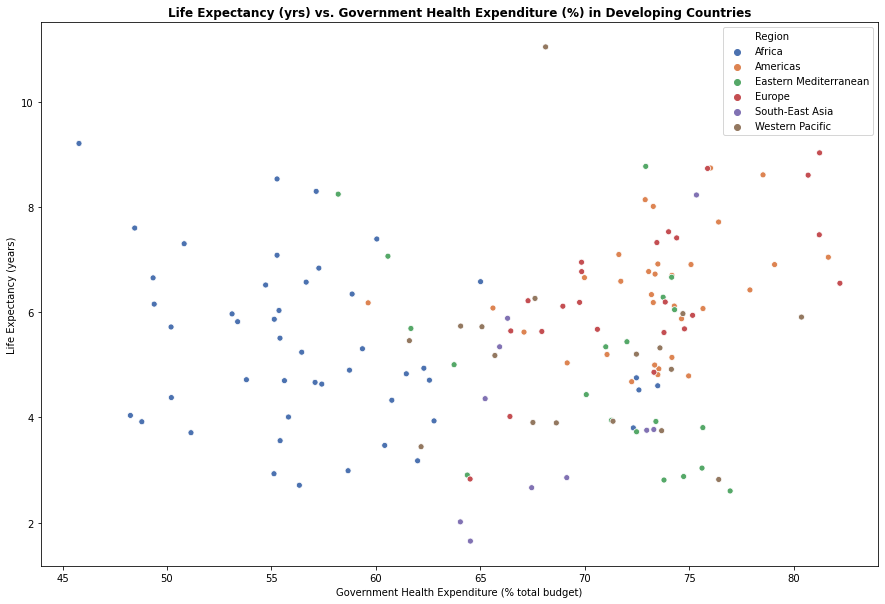

In [139]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.scatterplot(data=undev_grp, x ="Life Expectancy", y="Total Expenditure (%)", hue="Region", palette="deep")
plt.title("Life Expectancy (yrs) vs. Government Health Expenditure (%) in Developing Countries", fontweight="bold")
plt.xlabel("Government Health Expenditure (% total budget)")
plt.ylabel("Life Expectancy (years)")

In [17]:
dev_grp = dev_df.groupby(['Region', 'Country']).mean()
dev_grp = dev_grp[['Life Expectancy (yrs)', 'Total Expenditure (%)']]
dev_grp

Life Expectancy (yrs)  \
Region          Country                                                                     
Americas        United States of America                                        77.980000   
Europe          Austria                                                         81.480000   
                Belgium                                                         80.653333   
                Bulgaria                                                        72.740000   
                Croatia                                                         75.993333   
                Cyprus                                                          79.320000   
                Czechia                                                         76.633333   
                Denmark                                                         78.806667   
                Germany                                                         81.186667   
                Hungary                                                         73.693333   
                Iceland                                                         82.426667   
                Ireland                                                         80.066667   
                Italy                                                           82.153333   
                Latvia                                                          73.673333   
                Lithuania                                                       72.753333   
                Luxembourg                                                      80.700000   
                Malta                                                           80.273333   
                Netherlands                                                     81.080000   
                Norway                                                          81.793333   
                Poland                                                          75.526667   
                Portugal                                                        79.920000   
                Romania                                                         73.986667   
                Slovakia                                                        74.620000   
                Slovenia                                                        79.180000   
                Spain                                                           82.020000   
                Sweden                                                          82.526667   
                Switzerland                                                     82.260000   
                United Kingdom of Great Britain and Northern Ir...              80.766667   
Western Pacific Australia                                                       81.746667   
                Japan                                                           82.460000   
                New Zealand                                                     81.320000   
                Singapore                                                       81.366667   

                                                                    Total Expenditure (%)  
Region          Country                                                                    
Americas        United States of America                                        15.863333  
Europe          Austria                                                          4.715333  
                Belgium                                                          5.962000  
                Bulgaria                                                         7.236000  
                Croatia                                                          7.370667  
                Cyprus                                                           6.760000  
                Czechia                                                          7.050000  
                Denmark                                                      

In [125]:
undev_grp["Region"].unique()

array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'], dtype=object)

In [126]:
dev_df["Region"].unique()

array(['Western Pacific', 'Europe', 'Americas'], dtype=object)

In [127]:
dev_df["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Germany', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'], dtype=object)

In [128]:
undev_df["Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'South-East Asia', 'Western Pacific'], dtype=object)

In [129]:
names = undev_df["Country"].unique()
count = undev_df["Country"].nunique()
print(names, count)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Burkina Faso' 'Burundi' "Côte d'Ivoire"
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Cuba'
 'Democratic Republic of the Congo' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'India' 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq'
 'Israel' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait'
 'Kyrgyzstan' "Lao People's Democratic Republic" 'Lebanon' 'Lesotho'
 'Liberia' 'Libya' 'Madagascar' 'M

In [130]:
import seaborn as sns
spending_df.head()

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87


In [131]:
# look at one developing nation through the years
malawi_df = undev_df.loc[undev_df["Country"] == "Malawi"]
malawi_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
1571,Africa,Malawi,2014,Developing,57.6,11.38
1572,Africa,Malawi,2013,Developing,56.7,1.96
1573,Africa,Malawi,2012,Developing,55.3,12.60
1574,Africa,Malawi,2011,Developing,54.1,11.67
1575,Africa,Malawi,2010,Developing,52.9,1.50
1576,Africa,Malawi,2009,Developing,51.5,1.18
1577,Africa,Malawi,2008,Developing,50.0,1.70
1578,Africa,Malawi,2007,Developing,48.5,9.31
1579,Africa,Malawi,2006,Developing,47.1,8.99
1580,Africa,Malawi,2005,Developing,46.0,8.20


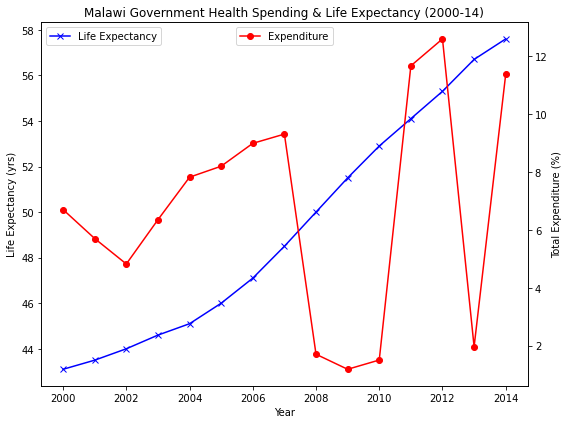

In [173]:
# plot gov expenditure and life expectancy over the years for Malawi (developing country)
fig, ax = plt.subplots(figsize =(8,6))

# twin object for dual y-axes on the same plot 
ax2 = ax.twinx()

# plot first y axis
line1 = ax.plot(malawi_df["Year"], malawi_df["Life Expectancy (yrs)"], color = "blue", marker = "x", label = "Life Expectancy")

#set x axis label
ax.set_xlabel("Year")
# set first y axis label 
ax.set_ylabel("Life Expectancy (yrs)")

# plot second y axis
line2 = ax2.plot(malawi_df["Year"], malawi_df["Total Expenditure (%)"], color = "red", marker = "o", label="Expenditure")
# set second y axis label
ax2.set_ylabel("Total Expenditure (%)")

ax.set_title("Malawi Government Health Spending & Life Expectancy (2000-14)")

ax.legend()
ax2.legend(loc = "upper center")

#save fig and display fig
plt.savefig("Catie_Images/MalawiExpenditure.png")
plt.tight_layout()
plt.show()


In [133]:
china_df = undev_df.loc[undev_df["Country"] == "China"]
china_df 

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
561,Western Pacific,China,2014,Developing,75.8,5.55
562,Western Pacific,China,2013,Developing,75.6,5.39
563,Western Pacific,China,2012,Developing,75.4,5.26
564,Western Pacific,China,2011,Developing,75.2,5.30
565,Western Pacific,China,2010,Developing,75.0,4.89
566,Western Pacific,China,2009,Developing,74.9,5.80
567,Western Pacific,China,2008,Developing,74.5,4.59
568,Western Pacific,China,2007,Developing,74.4,4.32
569,Western Pacific,China,2006,Developing,74.2,4.52
570,Western Pacific,China,2005,Developing,73.9,4.66


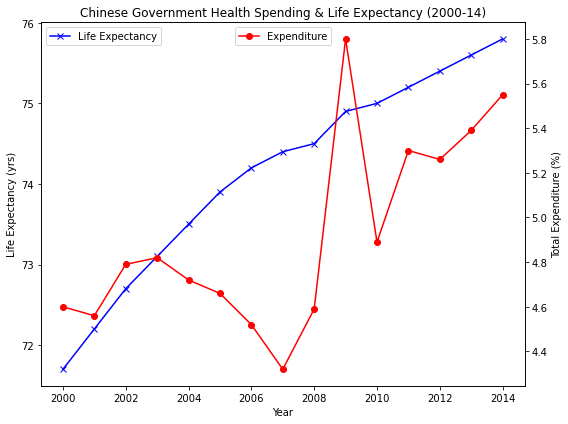

In [171]:
# plot gov expenditure and life expectancy over the years for China (developing country)
fig, ax = plt.subplots(figsize =(8,6))

# twin object for dual y-axes on the same plot 
ax2 = ax.twinx()

# plot first y axis
line1 = ax.plot(china_df["Year"], china_df["Life Expectancy (yrs)"], color = "blue", marker = "x", label = "Life Expectancy")

#set x axis label
ax.set_xlabel("Year")
# set first y axis label 
ax.set_ylabel("Life Expectancy (yrs)")

# plot second y axis
line2 = ax2.plot(china_df["Year"], china_df["Total Expenditure (%)"], color = "red", marker = "o", label="Expenditure")
# set second y axis label
ax2.set_ylabel("Total Expenditure (%)")

ax.set_title("Chinese Government Health Spending & Life Expectancy (2000-14)")

ax.legend()
ax2.legend(loc = "upper center")

#save fig and display fig
plt.savefig("Catie_Images/ChinaExpenditure.png")
plt.tight_layout()
plt.show()


In [136]:
japan_df = dev_df.loc[dev_df["Country"] == "Japan"]
japan_df 

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
1315,Western Pacific,Japan,2014,Developed,83.5,1.23
1316,Western Pacific,Japan,2013,Developed,83.5,1.25
1317,Western Pacific,Japan,2012,Developed,83.3,1.17
1318,Western Pacific,Japan,2011,Developed,82.5,1.70
1319,Western Pacific,Japan,2010,Developed,83.0,9.58
1320,Western Pacific,Japan,2009,Developed,83.0,9.51
1321,Western Pacific,Japan,2008,Developed,82.7,8.60
1322,Western Pacific,Japan,2007,Developed,82.6,8.25
1323,Western Pacific,Japan,2006,Developed,82.4,8.19
1324,Western Pacific,Japan,2005,Developed,82.0,8.18


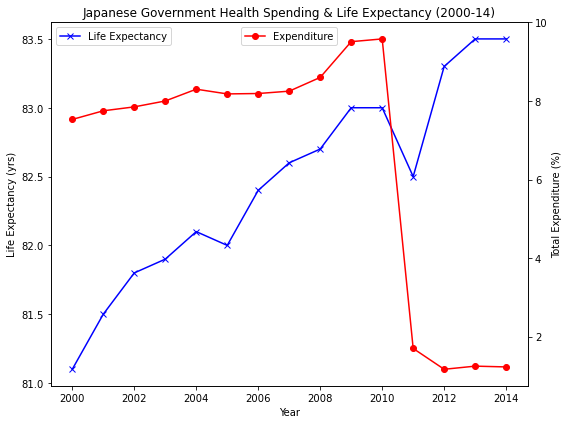

In [172]:
# plot gov expenditure and life expectancy over the years for Japan (developed country)
fig, ax = plt.subplots(figsize =(8,6))

# twin object for dual y-axes on the same plot 
ax2 = ax.twinx()

# plot first y axis
line1 = ax.plot(japan_df["Year"], japan_df["Life Expectancy (yrs)"], color = "blue", marker = "x", label = "Life Expectancy")

#set x axis label
ax.set_xlabel("Year")
# set first y axis label 
ax.set_ylabel("Life Expectancy (yrs)")

# plot second y axis
line2 = ax2.plot(japan_df["Year"], japan_df["Total Expenditure (%)"], color = "red", marker = "o", label="Expenditure")
# set second y axis label
ax2.set_ylabel("Total Expenditure (%)")

ax.set_title("Japanese Government Health Spending & Life Expectancy (2000-14)")

ax.legend()
ax2.legend(loc = "upper center")

#save fig and display fig
plt.savefig("Catie_Images/JapanExpenditure.png")
plt.tight_layout()
plt.show()
